<a href="https://colab.research.google.com/github/villafue/LinkedIn_Python_Stastics_Essential_Training/blob/master/04_03_bootstrapping_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python statistics essential training - 04_03_bootstrapping

Standard imports

In [ ]:
'''
It's been a year after Ms. Green was elected mayor. Because of her contentious
reforms, I poll citizens and ask them to grade her on a scale from 0 - 10.
Because I'm lazy, I take only 100 samples.

(When I use "he," especially in quotations, it means the presenter on the video)
'''

In [1]:
import math
import io
import os

In [2]:
os.chdir('sample_data')

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [6]:
pop = pd.read_csv('grades.csv')

In [7]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


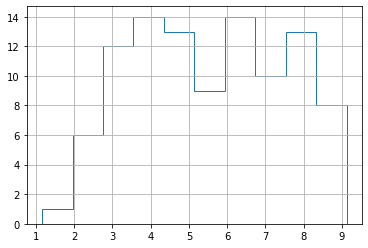

In [8]:
'''
The histogram doesn't have a recognizable form.
'''
pop.grade.hist(histtype='step')

In [9]:
'''
What is the "true" mean value? We cannot build a confidence interval because we
do not know how to describe it. For example, it is not a normal distribution.
We can see this by the shape of the histogram.
'''
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [ ]:
'''
We're going to bootstrap as it will give us an idea of the shape of the
distribution.

We're going to, "estimate the uncertainty of our statistic, the mean, by generating
a large family of samples from the one we have. And then, characterize the
distribution of the mean, of this family (of samples)."

We're going to sample with replacement.

As you can see, the mean is a little different in this sample.
'''
pop.sample(100,replace=True).describe()

,grade
count,100.000000
mean,5.436984
std,2.043781
min,1.160899
25%,3.620426
50%,5.860997
75%,7.132170
max,9.120705


In [11]:
'''
Above, the code was just a sample done once. Below, the sample is rewritten so 
it can be ran 1000 times. We're going to aggregate the mean and save it under
the column 'meangrade'. All this is wrapped in a dataframe.
'''

bootstrap = pd.DataFrame({'meangrade': [pop.sample(100,replace=True).grade.mean() for i in range(1000)]})

In [12]:
'''
Remember, that these are not grades, but means of grades.
'''
bootstrap.head()

,meangrade
0,5.820092
1,5.313492
2,5.613600
3,5.495966
4,5.448785


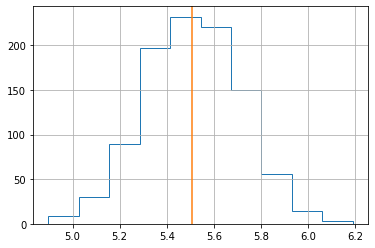

In [13]:
'''
We're going to draw a histogram. Furthermore, we're going to add a vertical line
to show the original mean of our dataframe pop. This can be seen with the code
axvline.

The mean is about the same as our original sample, but there is significant
spread around it. Because of this, we're going to extract the quantiles.
'''
bootstrap.meangrade.hist(histtype='step')
plt.axvline(pop.grade.mean(),color='C1')

In [14]:
'''
What this code does it rank, in order, the entire column of means and show
the lower-rank of 2.5% (5.117) and the higher-rank of 97.5% (5.895). This gives
our confidence interval of 95% with our lower and higher ranges.

He says that, "The "mean grade" is likely to be a passing one. The bootstrap
procedure requires that the sample you have is representative. And the procedure
is justified by rather complex mathematics under rather general assumptions.
For this case, I will show you that this guess is acceptable by showing you how
I really generated the data set."

Um, I believe that's all the scipy stats below.
'''
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.116680890531368, 5.895153301818647)

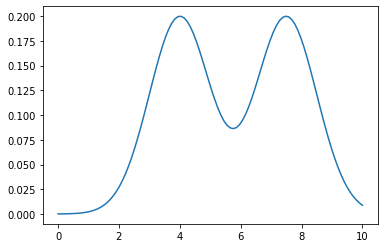

In [15]:
'''
He says, "The distribution I used was actually a sum of two normal distributions
with equal weights. We can use scipi stats to handle and play with distributions."

Below, ...norm(7.5,1) means that we're plotting a normal distribution with a mean
of 7.5 and a std of 1. We're plotting another normal distribution (n2) on the same
plot. np.linespace is a command for spacing. The arguments say this from left to right:
start at 0, end at 10, and have equal spacing of 100 inbetween the start and stop.

For the plot, x is the horizontal parameters as explained above with np.linespace.
I don't understand .5*n1 but it does have a probability density function using
the x spacing parameters. Adding together both pdfs equals the graph below.

It is called a bimodal distribution. It is also truncated because our grades
can only go from range 0-10

'''
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100)
plt.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [16]:
'''
He's creating a function to draw a single grade. ".rvs" means it takes a random
sample from that distribution (n1).
In essence, while having a 50% chance of chance of choosing either n1 or n2 
(code is np.random.rand <.5), take a random sample from n1 if np.random.rand is
less than .5 Otherwise, if np.random.rand equates to .5 or higher, 
take a random sample from n2. The range is 0 to 10.
'''

def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [17]:
draw()

7.677978073090242

In [18]:
'''
He says we're going to keep taking samples until we find one that's acceptable.
'''
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

In [22]:
test = dataset(100)
test.head()

,grade
0,3.618138
1,5.855357
2,7.746127
3,3.534423
4,8.303874


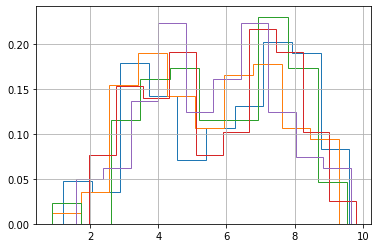

In [19]:
'''
We're going to plot a few of these samples. 
'''

for i in range(5):
    dataset(100).grade.hist(histtype='step',density=True)

In [23]:
'''
Same as above but in a bigger way and saving it to a variable.
'''
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})

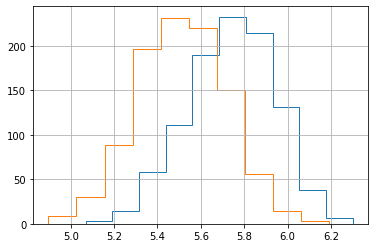

In [24]:
'''
We're comparing the means vs the bootstrap.

He says, "We can see that the two sampling distributions are displaced, bit the
spreads are comparable which justifies are approximated confidence interval.
'''
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')

In [ ]:
'''
Questions:

1. Why did he pick n1 and n2 of a mean of 7.5 and 4?
2. I don't understand his conclusions and his proof. I don't understand how
this relates back to our original exercise of bootstrapping.
'''